# importing packages

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn
import matplotlib
import seaborn as sns

import math
import matplotlib.pyplot as plt
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

# Loading Data
 

In [2]:
train_df= pd.read_csv("D://ASDC//task-two//train_data.csv")
test_df = pd.read_csv("D://ASDC//task-two//test_data.csv")

In [3]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
test_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


# EDA

In [6]:
train_df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [7]:
test_df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137022.000000,137057.000000,134900.000000,137057.000000,137057.000000
mean,386967.000000,18.343747,4.758692,3.192686,2.634489,65877.903515,7.243996,3.284531,4869.731097
std,39565.092259,8.634694,3.102245,1.164250,0.869295,37942.997623,4.790625,1.777270,1080.766723
min,318439.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1800.000000
25%,352703.000000,11.000000,2.000000,2.000000,2.000000,32945.000000,4.000000,2.000000,4178.000000
50%,386967.000000,19.000000,5.000000,3.000000,3.000000,65786.000000,8.000000,3.000000,4731.000000
75%,421231.000000,26.000000,7.000000,4.000000,3.000000,98851.000000,8.000000,4.000000,5398.000000
max,455495.000000,32.000000,13.000000,21.000000,4.000000,131618.000000,38.000000,32.000000,11920.000000


# <h5>concatenation of datasets

In [5]:
df = pd.concat([train_df, test_df])

In [9]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
df.shape

(455495, 18)

In [7]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455347.000000,455495.000000,448806.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,3.196140,2.628420,65786.793563,7.249495,3.284229,4877.434022
std,131490.22477,8.634036,3.102450,1.166994,0.871997,37968.830850,4.758941,1.768044,1084.982089
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,113874.50000,11.000000,2.000000,2.000000,2.000000,32874.000000,4.000000,2.000000,4184.000000
50%,227748.00000,19.000000,5.000000,3.000000,3.000000,65735.000000,8.000000,3.000000,4738.000000
75%,341621.50000,26.000000,7.000000,4.000000,3.000000,98576.500000,8.000000,4.000000,5405.000000
max,455495.00000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11920.000000


In [12]:
df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [13]:
df.corr()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.024139,-0.008247,0.023878,0.011755,-0.000235,0.038053,0.000818,-0.029820
Hospital_code,-0.024139,1.000000,0.127760,-0.058744,-0.015001,0.002912,-0.015260,-0.028168,0.046347
City_Code_Hospital,-0.008247,0.127760,1.000000,-0.045313,-0.048423,0.001617,-0.025153,0.018377,-0.034767
Available Extra Rooms in Hospital,0.023878,-0.058744,-0.045313,1.000000,-0.115303,0.001551,-0.008715,0.095790,-0.143479
Bed Grade,0.011755,-0.015001,-0.048423,-0.115303,1.000000,0.000579,-0.007052,0.089361,0.071705
patientid,-0.000235,0.002912,0.001617,0.001551,0.000579,1.000000,0.000979,0.002865,0.000033
City_Code_Patient,0.038053,-0.015260,-0.025153,-0.008715,-0.007052,0.000979,1.000000,-0.012611,0.025665
Visitors with Patient,0.000818,-0.028168,0.018377,0.095790,0.089361,0.002865,-0.012611,1.000000,-0.150008
Admission_Deposit,-0.029820,0.046347,-0.034767,-0.143479,0.071705,0.000033,0.025665,-0.150008,1.000000


# <h5>check duplicates

In [14]:
df.duplicated().sum()

0

# <h5>check missing values

In [15]:
df.isna().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
dtype: int64

In [16]:
for col in df.columns:
    prct_missing = np.mean(df[col].isnull()).round(5)*100
    print(f'{col} ->  {prct_missing }%')

case_id ->  0.0%
Hospital_code ->  0.0%
Hospital_type_code ->  0.0%
City_Code_Hospital ->  0.0%
Hospital_region_code ->  0.0%
Available Extra Rooms in Hospital ->  0.0%
Department ->  0.0%
Ward_Type ->  0.0%
Ward_Facility_Code ->  0.0%
Bed Grade ->  0.032%
patientid ->  0.0%
City_Code_Patient ->  1.469%
Type of Admission ->  0.0%
Severity of Illness ->  0.0%
Visitors with Patient ->  0.0%
Age ->  0.0%
Admission_Deposit ->  0.0%
Stay ->  30.09%


# <h1>Uni-Variant analysis

# <h6>categorical features

In [26]:
features=['Hospital_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Age','Stay']
for col in features:
    print('-----------------------------------------------------')
    print(f'number of unique values for {col} :',len(train_df[col].unique()))
    print(f'unique values for {col}:',train_df[col].unique())
    print(f'count of values for {col}',pd.DataFrame(train_df[col].value_counts()))
 


-----------------------------------------------------
number of unique values for Hospital_code : 32
unique values for Hospital_code: [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
count of values for Hospital_code     Hospital_code
26          33076
23          26566
19          21219
6           20425
11          17328
14          17328
28          17137
27          14244
9           11510
29          11311
12          11297
32          10703
25           9834
10           9435
15           9257
21           8150
24           7992
3            7116
17           5501
5            5261
1            5249
13           5236
2            5102
30           5002
22           4277
31           3967
16           3671
8            3663
18           3630
20           1405
7            1306
4            1240
-----------------------------------------------------
number of unique values for City_Code_Hospital : 11
unique values for City_Code_Hospi

# <h5>numerical features

In [18]:
features=['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']
for col in features:
    print(pd.DataFrame(df[col].describe()))
    print(pd.DataFrame(df[col].describe()))

    print('---------------------------------------')

       Available Extra Rooms in Hospital
count                      455495.000000
mean                            3.196140
std                             1.166994
min                             0.000000
25%                             2.000000
50%                             3.000000
75%                             4.000000
max                            24.000000
       Available Extra Rooms in Hospital
count                      455495.000000
mean                            3.196140
std                             1.166994
min                             0.000000
25%                             2.000000
50%                             3.000000
75%                             4.000000
max                            24.000000
---------------------------------------
       Visitors with Patient
count          455495.000000
mean                3.284229
std                 1.768044
min                 0.000000
25%                 2.000000
50%                 3.000000
75%                

# <h5>'Available Extra Rooms in Hospital' column

In [19]:
print('the least available number of rooms:',df['Available Extra Rooms in Hospital'].min())
print('the highest available number of rooms:',df['Available Extra Rooms in Hospital'].max())
print('the average available number of rooms:',math.floor(df['Available Extra Rooms in Hospital'].mean()))
print('the unique values of available number of rooms:',df['Available Extra Rooms in Hospital'].unique())

the least available number of rooms: 0
the highest available number of rooms: 24
the average available number of rooms: 3
the unique values of available number of rooms: [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]


In [20]:
pd.DataFrame(df['Available Extra Rooms in Hospital'].value_counts())

,Available Extra Rooms in Hospital
2,140895
4,131191
3,130755
5,27602
6,11003
1,7984
7,4107
8,1468
9,327
10,89


# <h5>'Visitors with Patient' column

In [21]:
print('the least number of Visitors with Patient:',df['Visitors with Patient'].min())
print('the highest number of Visitors with Patient:',df['Visitors with Patient'].max())
print('the average number of Visitors with Patient:',math.floor(df['Visitors with Patient'].mean()))
print('the unique number of Visitors with Patient:',df['Visitors with Patient'].unique())

the least number of Visitors with Patient: 0
the highest number of Visitors with Patient: 32
the average number of Visitors with Patient: 3
the unique number of Visitors with Patient: [ 2  4  3  8  6  7 13  5  1 10 15 11 12  9 24 16 14 20  0 19 18 17 23 21
 32 30 22 25 29]


In [22]:
pd.DataFrame(df['Visitors with Patient'].value_counts())

,Visitors with Patient
2,197734
4,113497
3,84689
6,27011
5,13314
8,6920
7,3556
9,1918
1,1776
10,1632


# <h5>'Admission_Deposit'column

In [23]:
print('the least value of Admission_Deposit:',math.floor(df['Admission_Deposit'].min()))
print('the highest value of Admission_Deposit:',math.floor(df['Admission_Deposit'].max()))
print('the average value of Admission_Deposit:',math.floor(df['Admission_Deposit'].mean()))

the least value of Admission_Deposit: 1800
the highest value of Admission_Deposit: 11920
the average value of Admission_Deposit: 4877


In [24]:
pd.DataFrame(df['Admission_Deposit'].value_counts())

,Admission_Deposit
4469.0,445
4277.0,427
4624.0,408
4789.0,378
4400.0,340
...,...
9593.0,1
8321.0,1
2342.0,1
9770.0,1


In [25]:
print('number of Admission_Deposits paid above the average:',df['Admission_Deposit'][df['Admission_Deposit']>df['Admission_Deposit'].mean()].count())

number of Admission_Deposits paid above the average: 198947


In [26]:
print('number of Admission_Deposits paid below the average:',df['Admission_Deposit'][df['Admission_Deposit']<df['Admission_Deposit'].mean()].count())

number of Admission_Deposits paid below the average: 256548


# Bi-Variant analysis

In [27]:
features=['Hospital_code','City_Code_Hospital','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Bed Grade','City_Code_Patient','Type of Admission','Severity of Illness','Age','Stay']
features=['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']

# <h5>"Hospital_code" column

In [28]:
pd.DataFrame(df.groupby('Hospital_type_code')['Hospital_code'].value_counts())

Hospital_code
Hospital_type_code Hospital_code               
a                  23                     38220
                   19                     30036
                   6                      29221
                   14                     24715
                   27                     20243
                   12                     16170
                   29                     16158
                   24                     11467
                   5                       7448
                   13                      7432
                   7                       1871
                   4                       1749
b                  26                     47523
                   11                     24827
                   28                     24572
                   20                      1962
c                  15                     13326
                   21                     11784
                   3                      10277
                   2                       7277
                   30                      7215
                   31                      5740
                   8                       5284
                   16                      5244
d                  9                      16360
                   1                       7460
                   18                      5228
e                  25                     14046
                   10                     13538
                   17                      7844
f                  32                     15252
g                  22                      6006

In [29]:
pd.DataFrame(df.groupby('City_Code_Hospital')['Hospital_code'].value_counts())

Hospital_code
City_Code_Hospital Hospital_code               
1                  14                     24715
                   25                     14046
                   10                     13538
                   24                     11467
                   17                      7844
                   5                       7448
2                  26                     47523
                   11                     24827
                   20                      1962
3                  21                     11784
                   3                      10277
                   30                      7215
                   31                      5740
                   8                       5284
                   16                      5244
4                  29                     16158
                   7                       1871
                   4                       1749
5                  9                      16360
                   15                     13326
                   13                      7432
                   2                       7277
6                  23                     38220
                   6                      29221
7                  19                     30036
                   27                     20243
9                  12                     16170
                   32                     15252
                   22                      6006
10                 1                       7460
11                 28                     24572
13                 18                      5228

In [30]:
pd.DataFrame(df.groupby('Hospital_region_code')['Hospital_code'].value_counts())

Hospital_code
Hospital_region_code Hospital_code               
X                    23                     38220
                     6                      29221
                     14                     24715
                     28                     24572
                     29                     16158
                     25                     14046
                     10                     13538
                     24                     11467
                     17                      7844
                     5                       7448
                     7                       1871
                     4                       1749
Y                    26                     47523
                     19                     30036
                     11                     24827
                     27                     20243
                     12                     16170
                     32                     15252
                     1                       7460
                     22                      6006
                     18                      5228
                     20                      1962
Z                    9                      16360
                     15                     13326
                     21                     11784
                     3                      10277
                     13                      7432
                     2                       7277
                     30                      7215
                     31                      5740
                     8                       5284
                     16                      5244

In [31]:
pd.set_option('display.max_rows', None)

pd.DataFrame(df.groupby('Hospital_code')['Department'].value_counts())

Department
Hospital_code Department                    
1             gynecology                6203
              radiotherapy               545
              anesthesia                 438
              TB & Chest disease         251
              surgery                     23
2             gynecology                6009
              radiotherapy               658
              anesthesia                 403
              TB & Chest disease         199
              surgery                      8
3             gynecology                8210
              radiotherapy               941
              anesthesia                 829
              TB & Chest disease         282
              surgery                     15
4             gynecology                1437
              anesthesia                 127
              radiotherapy               116
              TB & Chest disease          65
              surgery                      4
5             gynecology                5626
              anesthesia                1056
              radiotherapy               538
              TB & Chest disease         198
              surgery                     30
6             gynecology               22461
              anesthesia                3230
              radiotherapy              2543
              TB & Chest disease         878
              surgery                    109
7             gynecology                1472
              anesthesia                 186
              radiotherapy               138
              TB & Chest disease          69
              surgery                      6
8             gynecology                4477
              anesthesia                 346
              radiotherapy               343
              TB & Chest disease         106
              surgery                     12
9             gynecology               13439
              radiotherapy              1428
              anesthesia                1005
              TB & Chest disease         445
              surgery                     43
10            gynecology               10943
              anesthesia                1122
              radiotherapy              1080
              TB & Chest disease         352
              surgery                     41
11            gynecology               18873
              anesthesia                2689
              radiotherapy              2150
              TB & Chest disease        1048
              surgery                     67
12            gynecology               12772
              anesthesia                1441
              radiotherapy              1410
              TB & Chest disease         509
              surgery                     38
13            gynecology                6216
              radiotherapy               565
              anesthesia                 433
              TB & Chest disease         200
              surgery                     18
14            gynecology               18100
              anesthesia                3791
              radiotherapy              1964
              TB & Chest disease         758
              surgery                    102
15            gynecology               10688
              radiotherapy              1121
              anesthesia                1048
              TB & Chest disease         432
              surgery                     37
16            gynecology                3907
              anesthesia                 653
              radiotherapy               503
              TB & Chest disease         171
              surgery                     10
17            gynecology                6345
              anesthesia                 709
              radiotherapy               548
              TB & Chest disease         211
              surgery                     31
18            gynecology                4371
              radiotherapy               394
              anesthesia     

In [32]:
pd.DataFrame(df.groupby('Ward_Type')['Hospital_code'].value_counts())

Hospital_code
Ward_Type Hospital_code               
P         26                      2237
          27                      1602
          14                      1334
          15                      1280
          16                       376
          31                       370
Q         11                     22137
          23                     20382
          26                     15979
          19                     15440
          6                      13630
          14                     11358
          10                      7641
          15                      7589
          9                       5858
          12                      5343
          30                      3777
          3                       3641
          25                      2697
          5                       2569
          8                       2414
          18                      2237
          27                      2161
          1                       1830
          21                      1483
          24                      1419
          2                       1071
          29                       699
          31                       689
          28                         2
R         28                     24570
          26                     19045
          23                     15648
          6                      15591
          27                     11946
          24                     10048
          29                      7987
          17                      7844
          13                      7432
          14                      6456
          12                      6119
          3                       5863
          9                       4955
          5                       4879
          25                      3910
          19                      3420
          31                      3132
          30                      3061
          1                       2890
          22                      2864
          8                       2856
          21                      2698
          18                      2192
          7                       1871
          16                      1822
          4                       1749
          15                      1516
          10                       575
S         32                     15252
          19                     11176
          26                     10262
          21                      7603
          29                      7472
          25                      7439
          2                       6206
          14                      5567
          9                       5547
          10                      5322
          27                      4534
          12                      3674
          22                      3142
          16                      3046
          15                      2941
          11                      2690
          1                       2440
          23                      2190
          20                      1962
          31                      1549
          3                        773
          30                       377
          8                          2
T         12                      1034
          18                       799
          1                        300
U         8                         12

In [33]:
pd.DataFrame(df.groupby('Hospital_code')['Severity of Illness'].value_counts())

Severity of Illness
Hospital_code Severity of Illness                     
1             Moderate                            4178
              Minor                               1873
              Extreme                             1409
2             Moderate                            4100
              Minor                               1837
              Extreme                             1340
3             Moderate                            5588
              Minor                               2908
              Extreme                             1781
4             Moderate                             950
              Minor                                471
              Extreme                              328
5             Moderate                            3858
              Minor                               2609
              Extreme                              981
6             Moderate                           16172
              Minor                               8545
              Extreme                             4504
7             Moderate                            1026
              Minor                                540
              Extreme                              305
8             Moderate                            2849
              Minor                               1552
              Extreme                              883
9             Moderate                            9221
              Minor                               4440
              Extreme                             2699
10            Moderate                            7453
              Minor                               3642
              Extreme                             2443
11            Moderate                           12973
              Minor                               7993
              Extreme                             3861
12            Moderate                            8793
              Minor                               4371
              Extreme                             3006
13            Moderate                            4161
              Minor                               1981
              Extreme                             1290
14            Moderate                           13389
              Minor                               7510
              Extreme                             3816
15            Moderate                            7385
              Minor                               3537
              Extreme                             2404
16            Moderate                            2825
              Minor                               1518
              Extreme                              901
17            Moderate                            4300
              Minor                               2358
              Extreme                             1186
18            Moderate                            2851
              Minor                               1419
              Extreme                              958
19            Moderate                           17618
              Extreme                             6990
              Minor                               5428
20            Moderate                            1077
              Minor                                572
              Extreme                              313
21            Moderate                            6365
              Minor                               3328
              Extreme                             2091
22            Moderate                            3375
              Minor                               1332
              Extreme                             1299
23            Moderate                           21029
              Minor                              11084
              Extreme                             6107
24            Moderate                            6141
              Minor                               3520
              Extrem

# <h5>'Hospital_type_code'column

In [34]:
pd.DataFrame(df.groupby('Hospital_type_code')['Admission_Deposit'].sum())

,Admission_Deposit
Hospital_type_code,
a,986780840.0
b,482955838.0
c,337356490.0
d,140961903.0
e,166930550.0
f,77037219.0
g,29623970.0


In [35]:
pd.DataFrame(df.groupby('Hospital_type_code')['Severity of Illness'].value_counts())

Severity of Illness
Hospital_type_code Severity of Illness                     
a                  Moderate                          113421
                   Minor                              55227
                   Extreme                            36082
b                  Moderate                           54686
                   Minor                              26389
                   Extreme                            17809
c                  Moderate                           36244
                   Minor                              18052
                   Extreme                            11851
d                  Moderate                           16250
                   Minor                               7732
                   Extreme                             5066
e                  Moderate                           19378
                   Minor                               9996
                   Extreme                             6054
f                  Moderate                            8211
                   Minor                               4007
                   Extreme                             3034
g                  Moderate                            3375
                   Minor                               1332
                   Extreme                             1299

In [36]:
pd.DataFrame(df.groupby('Hospital_type_code')['Type of Admission'].value_counts())

Type of Admission
Hospital_type_code Type of Admission                   
a                  Trauma                         90786
                   Emergency                      87995
                   Urgent                         25949
b                  Trauma                         50475
                   Emergency                      31637
                   Urgent                         16772
c                  Trauma                         32547
                   Emergency                      20887
                   Urgent                         12713
d                  Trauma                         14727
                   Emergency                       8662
                   Urgent                          5659
e                  Trauma                         18494
                   Emergency                      12527
                   Urgent                          4407
f                  Trauma                          7655
                   Emergency                       5189
                   Urgent                          2408
g                  Trauma                          2988
                   Urgent                          1552
                   Emergency                       1466

# <h5>"City_Code_Hospital" column

In [37]:
pd.DataFrame(df.groupby('Ward_Type')['City_Code_Hospital'].value_counts())

City_Code_Hospital
Ward_Type City_Code_Hospital                    
P         2                                 2237
          7                                 1602
          1                                 1334
          5                                 1280
          3                                  746
Q         2                                38116
          6                                34012
          1                                25684
          7                                17601
          5                                14518
          3                                12004
          9                                 5343
          13                                2237
          10                                1830
          4                                  699
          11                                   2
R         1                                33712
          6                                31239
          11                               24570
          3                                19432
          2                                19045
          7                                15366
          5                                13903
          4                                11607
          9                                 8983
          10                                2890
          13                                2192
S         9                                22068
          1                                18328
          7                                15710
          2                                14914
          5                                14694
          3                                13350
          4                                 7472
          10                                2440
          6                                 2190
T         9                                 1034
          13                                 799
          10                                 300
U         3                                   12

In [38]:
pd.DataFrame(df.groupby('Department')['City_Code_Hospital'].value_counts())

City_Code_Hospital
Department         City_Code_Hospital                    
TB & Chest disease 2                                 2894
                   6                                 2188
                   1                                 2165
                   9                                 1315
                   5                                 1276
                   3                                 1219
                   11                                1059
                   7                                  647
                   4                                  618
                   10                                 251
                   13                                 119
anesthesia         6                                 9876
                   1                                 8860
                   2                                 8093
                   3                                 3972
                   5                                 2889
                   9                                 2885
                   11                                2019
                   4                                 1905
                   7                                 1083
                   10                                 438
                   13                                 338
gynecology         1                                61742
                   2                                55701
                   6                                48892
                   7                                42030
                   3                                36430
                   5                                36352
                   9                                29883
                   11                               19387
                   4                                15697
                   10                                6203
                   13                                4371
radiotherapy       2                                 7382
                   6                                 6214
                   7                                 6099
                   1                                 6008
                   3                                 3810
                   5                                 3772
                   9                                 3255
                   11                                2055
                   4                                 1499
                   10                                 545
                   13                                 394
surgery            7                                  420
                   1                                  283
                   6                                  271
                   2                                  242
                   3                                  113
                   5                                  106
                   9                                   90
                   4                                   59
                   11                                  52
                   10                                  23
                   13                                   6

# <h5>"Hospital_region_code" column

In [39]:
pd.DataFrame(df.groupby('Hospital_region_code')['Type of Admission'].value_counts())

Type of Admission
Hospital_region_code Type of Admission                   
X                    Trauma                        101662
                     Emergency                      62105
                     Urgent                         27082
Y                    Emergency                      77599
                     Trauma                         71457
                     Urgent                         25651
Z                    Trauma                         44553
                     Emergency                      28659
                     Urgent                         16727

In [40]:
pd.DataFrame(df.groupby('Hospital_region_code')['Severity of Illness'].value_counts())

Severity of Illness
Hospital_region_code Severity of Illness                     
X                    Moderate                          104747
                     Minor                              55286
                     Extreme                            30816
Y                    Moderate                           97192
                     Minor                              42976
                     Extreme                            34539
Z                    Moderate                           49626
                     Minor                              24473
                     Extreme                            15840

In [41]:
pd.DataFrame(df.groupby('Hospital_region_code')['Admission_Deposit'].sum())

,Admission_Deposit
Hospital_region_code,
X,918695598.0
Y,848114857.0
Z,454836355.0


In [42]:
pd.DataFrame(df.groupby('Age')['Hospital_region_code'].value_counts())

Hospital_region_code
Age    Hospital_region_code                      
0-10   X                                     3791
       Y                                     3441
       Z                                     1908
11-20  X                                     9739
       Y                                     9192
       Z                                     4940
21-30  X                                    23490
       Y                                    22622
       Z                                    12448
31-40  X                                    37913
       Y                                    33928
       Z                                    18579
41-50  X                                    38777
       Y                                    34801
       Z                                    17917
51-60  X                                    29765
       Y                                    26730
       Z                                    13011
61-70  X                                    20611
       Y                                    18947
       Z                                     9061
71-80  X                                    21341
       Y                                    19906
       Z                                     9490
81-90  X                                     4653
       Y                                     4379
       Z                                     2208
91-100 X                                      769
       Y                                      761
       Z                                      377

# <h5>'stay'column

In [43]:
pd.DataFrame(df.groupby('Department')['Stay'].value_counts())

Stay
Department         Stay                     
TB & Chest disease 21-30                2618
                   11-20                2379
                   31-40                1753
                   51-60                1047
                   0-10                  791
                   41-50                 300
                   71-80                 294
                   81-90                 140
                   More than 100 Days    124
                   61-70                  76
                   91-100                 64
anesthesia         21-30                8950
                   11-20                8823
                   31-40                4958
                   51-60                2527
                   0-10                 1519
                   41-50                 851
                   71-80                 703
                   More than 100 Days    605
                   81-90                 384
                   61-70                 173
                   91-100                156
gynecology         21-30               68383
                   11-20               59690
                   31-40               43535
                   51-60               27989
                   0-10                18849
                   41-50                9671
                   71-80                8165
                   More than 100 Days   4961
                   81-90                3748
                   91-100               2269
                   61-70                2226
radiotherapy       21-30                7263
                   11-20                6988
                   31-40                4713
                   51-60                3256
                   0-10                 2379
                   71-80                1043
                   More than 100 Days    947
                   41-50                 879
                   81-90                 528
                   61-70                 264
                   91-100                256
surgery            21-30                 277
                   11-20                 259
                   31-40                 200
                   51-60                 199
                   0-10                   66
                   71-80                  49
                   More than 100 Days     46
                   41-50                  42
                   81-90                  38
                   91-100                 20
                   61-70                   5

In [44]:
pd.DataFrame(train_df.groupby('Stay')['Severity of Illness'].value_counts())

Severity of Illness
Stay               Severity of Illness                     
0-10               Moderate                           12339
                   Minor                               7866
                   Extreme                             3399
11-20              Moderate                           40540
                   Minor                              27081
                   Extreme                            10518
21-30              Moderate                           50454
                   Minor                              21535
                   Extreme                            15502
31-40              Moderate                           30626
                   Minor                              14447
                   Extreme                            10086
41-50              Moderate                            6392
                   Minor                               3000
                   Extreme                             2351
51-60              Moderate                           20113
                   Extreme                             7777
                   Minor                               7128
61-70              Moderate                            1578
                   Extreme                              647
                   Minor                                519
71-80              Moderate                            5751
                   Extreme                             2575
                   Minor                               1928
81-90              Moderate                            2740
                   Extreme                             1113
                   Minor                                985
91-100             Moderate                            1535
                   Extreme                              805
                   Minor                                425
More than 100 Days Moderate                            3775
                   Extreme                             1950
                   Minor                                958

# <h5>'Age'column

In [45]:
pd.DataFrame(df.groupby('Age')['Ward_Type'].value_counts())

Ward_Type
Age    Ward_Type           
0-10   R               3359
       Q               3221
       S               2318
       P                191
       T                 51
11-20  R               9195
       Q               7638
       S               6459
       P                439
       T                140
21-30  R              24305
       Q              18600
       S              14441
       P                894
       T                318
       U                  2
31-40  R              37987
       Q              30972
       S              19699
       P               1306
       T                453
       U                  3
41-50  R              35950
       Q              33246
       S              20445
       P               1464
       T                387
       U                  3
51-60  R              26705
       Q              24366
       S              16968
       P               1202
       T                264
       U                  1
61-70  R              19045
       Q              15624
       S              12966
       P                742
       T                240
       U                  2
71-80  R              20812
       Q              14693
       S              14250
       P                742
       T                240
81-90  R               4805
       S               3113
       Q               3103
       P                186
       T                 32
       U                  1
91-100 R                776
       Q                583
       S                507
       P                 33
       T                  8

# # Multi-Variant analysis

In [46]:
pd.DataFrame(df.groupby('Hospital_code')['Hospital_type_code','City_Code_Hospital','Hospital_region_code'].value_counts())

C:\Users\RAHEEM\AppData\Local\Temp\ipykernel_18772\2711140061.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby('Hospital_code')['Hospital_type_code','City_Code_Hospital','Hospital_region_code'].value_counts())


,,,,0
Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,
1,d,10,Y,7460
2,c,5,Z,7277
3,c,3,Z,10277
4,a,4,X,1749
5,a,1,X,7448
6,a,6,X,29221
7,a,4,X,1871
8,c,3,Z,5284
9,d,5,Z,16360


In [47]:
pd.DataFrame(df.groupby('Ward_Facility_Code')['Department'].value_counts())

Department
Ward_Facility_Code Department                    
A                  gynecology               31953
                   anesthesia                3626
                   radiotherapy              3467
                   TB & Chest disease        1113
                   surgery                    101
B                  gynecology               40457
                   radiotherapy              4194
                   anesthesia                3661
                   TB & Chest disease        1685
                   surgery                    119
C                  gynecology               42030
                   radiotherapy              6099
                   anesthesia                1083
                   TB & Chest disease         647
                   surgery                    420
D                  gynecology               55701
                   anesthesia                8093
                   radiotherapy              7382
                   TB & Chest disease        2894
                   surgery                    242
E                  gynecology               61742
                   anesthesia                8860
                   radiotherapy              6008
                   TB & Chest disease        2165
                   surgery                    283
F                  gynecology              124805
                   anesthesia               17035
                   radiotherapy             13883
                   TB & Chest disease        5247
                   surgery                    500

In [48]:
pd.DataFrame(df.groupby('Department')['Ward_Type'].value_counts())

Ward_Type
Department         Ward_Type           
TB & Chest disease R               5501
                   Q               4136
                   S               3790
                   P                257
                   T                 67
anesthesia         R              18121
                   Q              12842
                   S              10702
                   P                511
                   T                182
gynecology         R             142633
                   Q             121823
                   S              84768
                   P               5771
                   T               1681
                   U                 12
radiotherapy       R              16108
                   Q              12702
                   S              11393
                   P                631
                   T                199
surgery            R                576
                   Q                543
                   S                513
                   P                 29
                   T                  4

In [49]:
pd.DataFrame(df.groupby('Type of Admission')['Severity of Illness','Department'].value_counts())

C:\Users\RAHEEM\AppData\Local\Temp\ipykernel_18772\668735209.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby('Type of Admission')['Severity of Illness','Department'].value_counts())


0
Type of Admission Severity of Illness Department               
Emergency         Moderate            gynecology          72112
                  Minor               gynecology          42530
                  Extreme             gynecology          22303
                  Moderate            radiotherapy         9526
                                      anesthesia           4425
                  Minor               radiotherapy         4418
                  Extreme             radiotherapy         3244
                  Moderate            TB & Chest disease   2418
                  Minor               anesthesia           2203
                  Extreme             anesthesia           1515
                  Minor               TB & Chest disease   1279
                  Moderate            surgery               910
                  Extreme             TB & Chest disease    786
                                      surgery               551
                  Minor               surgery               143
Trauma            Moderate            gynecology          92840
                  Minor               gynecology          40833
                  Extreme             gynecology          31052
                  Moderate            anesthesia          16377
                                      radiotherapy        10664
                  Minor               anesthesia           6199
                  Extreme             anesthesia           5167
                  Moderate            TB & Chest disease   3985
                  Minor               radiotherapy         3865
                  Extreme             radiotherapy         3650
                  Minor               TB & Chest disease   1603
                  Extreme             TB & Chest disease   1382
                  Moderate            surgery                31
                  Extreme             surgery                19
                  Minor               surgery                 5
Urgent            Moderate            gynecology          30075
                  Minor               gynecology          16004
                  Extreme             gynecology           8939
                  Moderate            anesthesia           3684
                                      radiotherapy         3199
                  Minor               anesthesia           1683
                                      radiotherapy         1386
                  Moderate            TB & Chest disease   1317
                  Extreme             anesthesia           1105
                                      radiotherapy         1081
                  Minor               TB & Chest disease    582
                  Extreme             TB & Chest disease    399
                                      surgery                 2
                  Minor               surgery                 2
                  Moderate            surgery                 2

In [50]:
pd.DataFrame(df.groupby('Type of Admission')['Bed Grade','Severity of Illness'].value_counts())

C:\Users\RAHEEM\AppData\Local\Temp\ipykernel_18772\2488196092.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pd.DataFrame(df.groupby('Type of Admission')['Bed Grade','Severity of Illness'].value_counts())


0
Type of Admission Bed Grade Severity of Illness       
Emergency         2.0       Moderate             44069
                  3.0       Moderate             23627
                            Minor                21812
                  2.0       Minor                16490
                            Extreme              11191
                  4.0       Moderate             11091
                  1.0       Moderate             10567
                  4.0       Minor                 9945
                  1.0       Extreme               8374
                  3.0       Extreme               5853
                  4.0       Extreme               2972
                  1.0       Minor                 2306
Trauma            2.0       Moderate             57952
                  3.0       Moderate             41048
                            Minor                30736
                  4.0       Moderate             22167
                  2.0       Extreme              15764
                  4.0       Minor                15256
                  3.0       Extreme              10496
                  1.0       Extreme               8817
                  2.0       Minor                 6240
                  4.0       Extreme               6148
                  1.0       Moderate              2695
                            Minor                  271
Urgent            2.0       Moderate             17178
                  3.0       Moderate             12081
                            Minor                10358
                  4.0       Moderate              7339
                            Minor                 5682
                  2.0       Extreme               4093
                            Minor                 3474
                  3.0       Extreme               2931
                  1.0       Extreme               2715
                  4.0       Extreme               1787
                  1.0       Moderate              1679
                            Minor                  143

# # Data preprocessing

 <h3>handle missing values

 <h5>'Bed Grade' column

In [5]:
mode_Bed_Grad=df['Bed Grade'].mode()[0]
df['Bed Grade'].replace(np.nan,mode_Bed_Grad,inplace=True)

# <h5>'City_Code_Patient' column

In [6]:
median_City_Code_Patient=df['City_Code_Patient'].median()
#median_City_Code_Patient
df['City_Code_Patient'].replace(np.nan,median_City_Code_Patient,inplace=True)

# <h5>'Stay' column

In [7]:
mode_Stay=df['Stay'].mode()[0]
#mode_Stay
df['Stay'].replace(np.nan,mode_Stay,inplace=True)

# <h3>check the outliers 

In [54]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

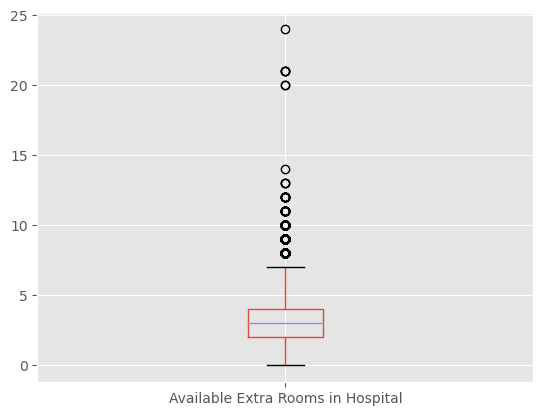

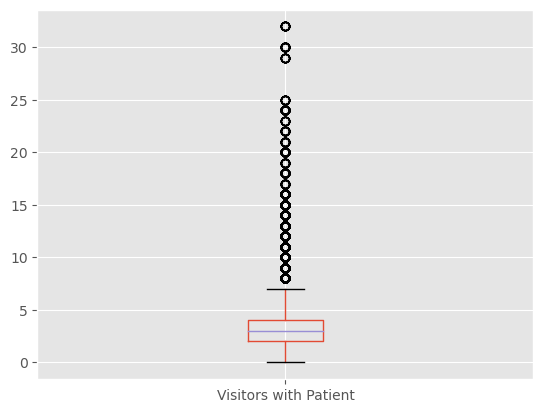

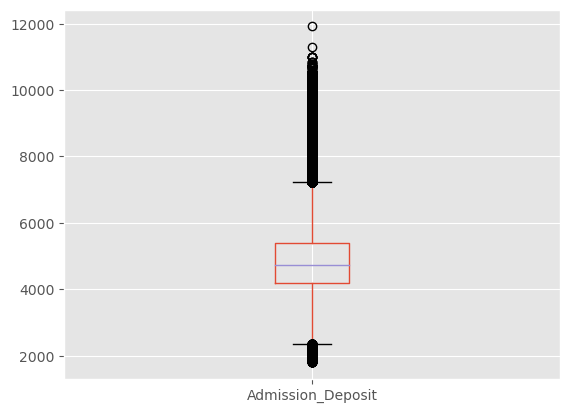

In [8]:
features=['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']
for col in features:
    df.boxplot(column=[col])
    plt.show()

# <h2>handle missing values

In [9]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range , upper_range

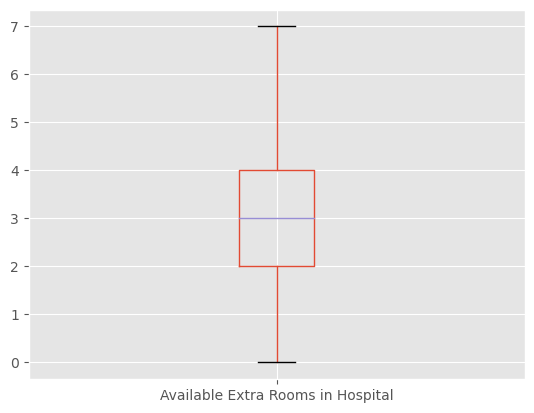

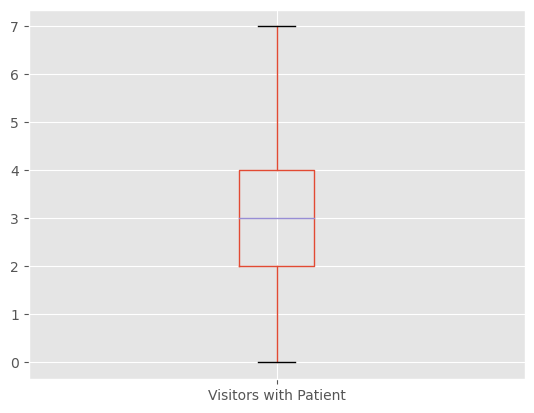

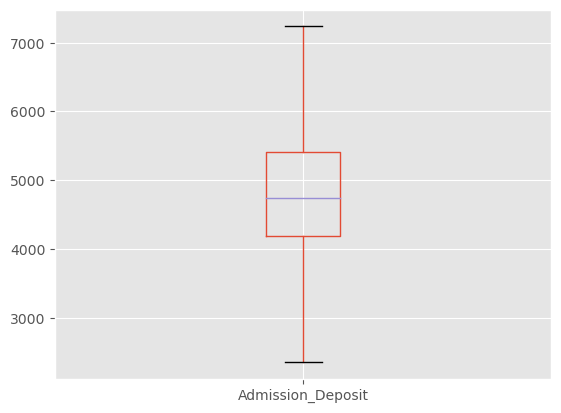

In [10]:
features=['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']
for col in features:

    lowincome,uppincome=remove_outlier(df[col])
    df[col]=np.where(df[col]>uppincome,uppincome,df[col])
    df[col]=np.where(df[col]<lowincome,lowincome,df[col])
    df.boxplot(column=[col])
    plt.show()

# # Scaling numerical features

In [11]:
for col in features:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[[col]])

In [59]:
df.describe()


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,455495.00000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000,455495.000000
mean,227748.00000,18.326335,4.767798,0.455747,2.628215,65786.793563,7.260517,0.456651,0.511187
std,131490.22477,8.634036,3.102450,0.163118,0.871929,37968.830850,4.724731,0.198162,0.204510
min,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,113874.50000,11.000000,2.000000,0.285714,2.000000,32874.000000,4.000000,0.285714,0.375000
50%,227748.00000,19.000000,5.000000,0.428571,3.000000,65735.000000,8.000000,0.428571,0.488432
75%,341621.50000,26.000000,7.000000,0.571429,3.000000,98576.500000,8.000000,0.571429,0.625000
max,455495.00000,32.000000,13.000000,1.000000,4.000000,131624.000000,38.000000,1.000000,1.000000


# # Encoding

In [12]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,0.428571,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,0.285714,51-60,0.523853,0-10
1,2,2,c,5,Z,0.285714,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,0.285714,51-60,0.737408,41-50
2,3,10,e,1,X,0.285714,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,0.285714,51-60,0.489865,31-40
3,4,26,b,2,Y,0.285714,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,0.285714,51-60,1.000000,41-50
4,5,26,b,2,Y,0.285714,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,0.285714,51-60,0.656327,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,0.571429,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,0.571429,41-50,0.810913,21-30
137053,455492,25,e,1,X,0.285714,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,0.285714,0-10,0.236998,21-30
137054,455493,30,c,3,Z,0.285714,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,0.285714,0-10,0.990479,21-30
137055,455494,5,a,1,X,0.285714,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,0.285714,41-50,0.631143,21-30


In [ ]:
df.describe()

In [13]:
features=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age','Stay']
le = preprocessing.LabelEncoder()
for col in features:
    df[col]= le.fit_transform(df[col])

In [ ]:
df

# Data Visualization

In [14]:
train_df.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [15]:
plt.figure(figsize=(16,6))
sns.barplot(x="Hospital_code", y="City_Code_Hospital", data=train_df.sort_values("Age"))

<AxesSubplot:xlabel='Hospital_code', ylabel='City_Code_Hospital'>

In [16]:
sns.distplot(df['Admission_Deposit'])

D:\coding programs\python\anaconde-new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admission_Deposit', ylabel='City_Code_Hospital'>

In [17]:
sns.displot(data=train_df, x="Ward_Facility_Code")

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(x="Stay", y="Bed Grade", data=train_df.sort_values("Age"))

<AxesSubplot:xlabel='Stay', ylabel='Bed Grade'>

In [24]:
sns.displot(data=train_df, x="City_Code_Hospital", hue=None, kind="kde")

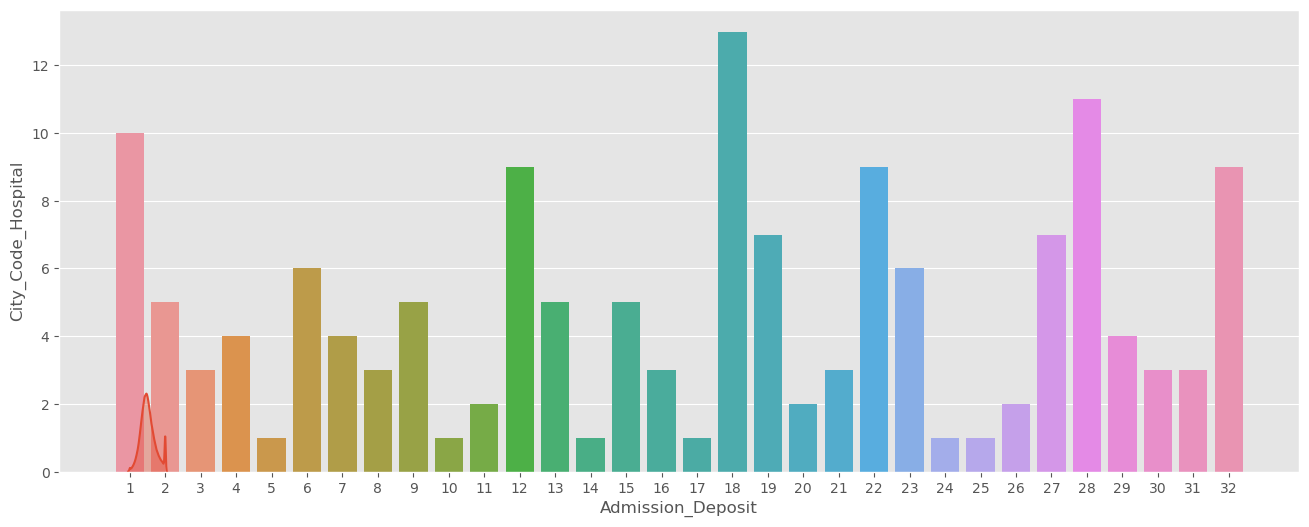

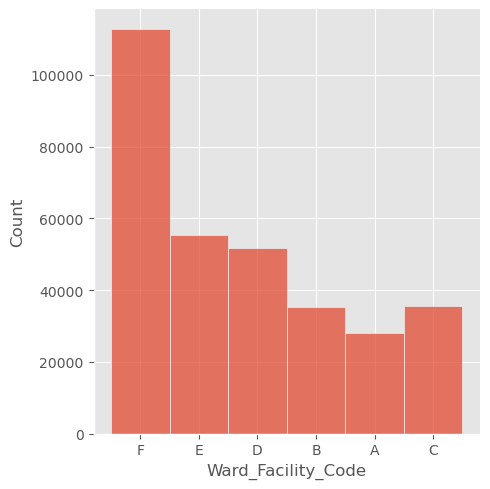

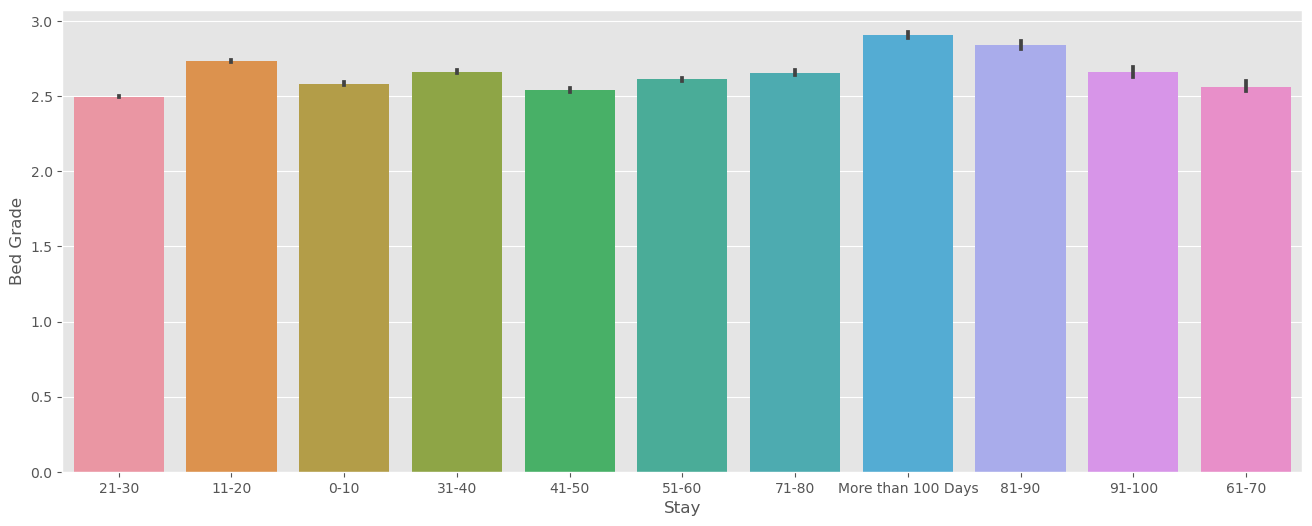

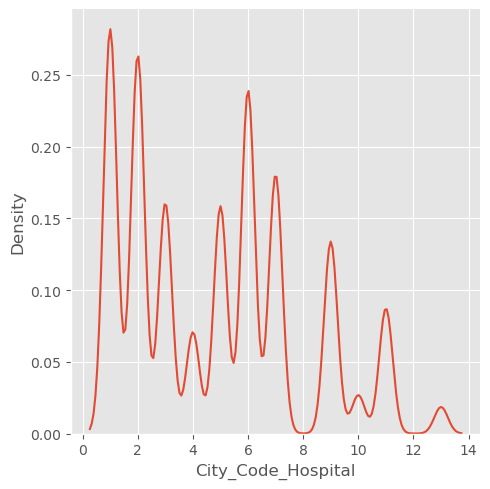

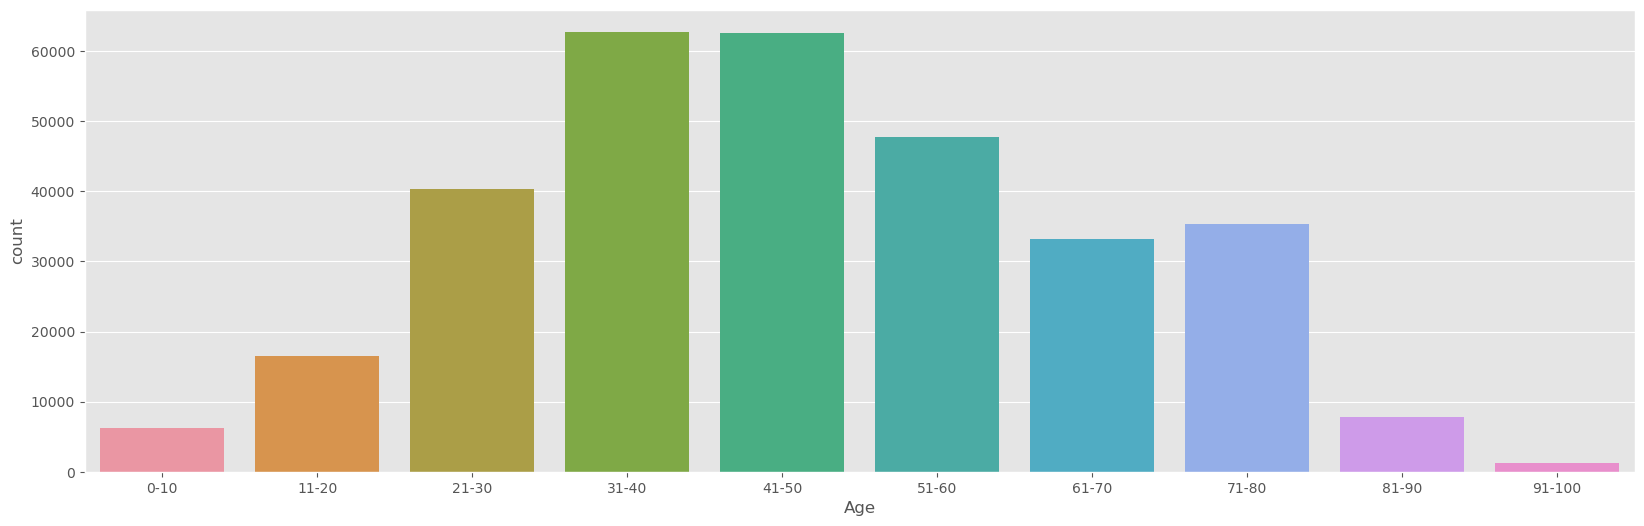

In [20]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train_df.dropna().sort_values("Age").reset_index(drop=True), x="Age")
plt.show()

In [23]:
sns.catplot(data=df, x="Type of Admission", y="Age", kind="box")

In [22]:
train_df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [ ]:
sns.stripplot(data=train_df, y="Department", x="Severity of Illness", hue="Type of Admission")

In [ ]:
# Bar plot for the type of each film and the distribution count 

plt.figure(figsize=(10, 6))
sns.countplot(y='Hospital_code', data=train_df, order=df['Hospital_type_code'].value_counts().index)
plt.title('Party Distribution')
plt.xlabel('Count')
plt.ylabel('Hospital_code')
plt.tight_layout()
plt.show()

In [ ]:
train_df

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(train_df, x="Department",color = 'Ward_Type')
fig.show()

In [ ]:
import plotly.express as px

df = px.data.tips()

fig = px.box(train_df, x="Age", y="Ward_Type", color="Severity of Illness")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df['Age'].hist(bins=70)

plt.subplot(122)
df.boxplot(column='Age', showfliers=False)




# # Splitting the dataset into the training and validation sets

In [ ]:
data=df
y=df.Stay
features=data.columns
X=data[features.drop('Stay')]

In [ ]:
train_X, test_X, test_y, test_y = train_test_split(X, y, random_state = 0)

In [ ]:
model = XGBClassifier()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
mse=mean_absolute_error(test_y,predictions)
print("Mean Absolute Error: " + str(mse))

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

In [ ]:
df.drop(['case_id', 'patientid'], axis=1,inplace=True)

In [ ]:
df

In [ ]:
data=df
y=df.Stay
features=data.columns
X=data[features.drop('Stay')]

In [ ]:
X

In [ ]:
y

In [ ]:
train_X, test_X, test_y, test_y = train_test_split(X, y, random_state = 0)

In [ ]:
model = XGBClassifier()
model.fit(train_X, train_y)
predictions = model.predict(test_X)
mse=mean_absolute_error(test_y,predictions)
print("Mean Absolute Error: " + str(mse))

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())